### Imagine we have a marketing email with a 10% success rate ($p=0.1$). We send it to 20 people ($n=20$). We want to see the probability of getting exactly $k$ successes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


# 'n' is the number of independent trials. 
# Think of this as sending 20 emails or flipping a coin 20 times.
n = 20    

# 'p' is the probability of success in a single trial.
# 0.1 means there is a 10% chance of a "Success" (e.g., a click or a Head).
p = 0.1   

# 'k_values' creates a list of all possible outcomes.
# In 20 trials, you could have anywhere from 0 to 20 successes.
# np.arange(0, 21) generates: [0, 1, 2, ..., 20]
k_values = np.arange(0, n + 1)

In [4]:
# --- 2. PROBABILITY MASS FUNCTION (PMF) ---
# The PMF tells us the probability of getting EXACTLY 'k' successes.
# Formula: P(X=k) = (n choose k) * p^k * (1-p)^(n-k)
pmf_values = binom.pmf(k_values, n, p)

In [5]:
# --- 3. CUMULATIVE DISTRIBUTION FUNCTION (CDF) ---
# The CDF tells us the probability of getting 'k' or FEWER successes.
# Useful for asking: "What is the chance we get at most 3 clicks?"
cdf_values = binom.cdf(k_values, n, p)

([<matplotlib.axis.XTick at 0x1fc4383e0d0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

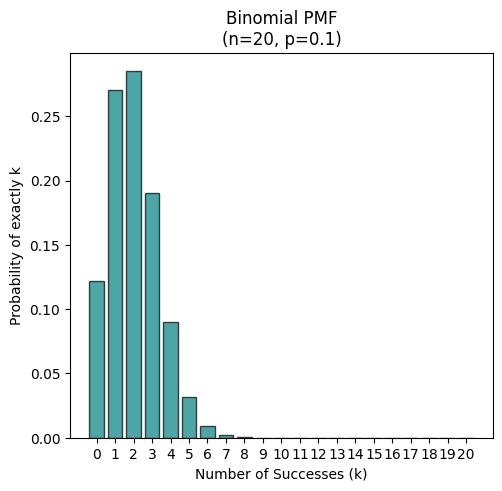

In [8]:

# Create a figure container with two side-by-side subplots
plt.figure(figsize=(12, 5))

# --- Subplot 1: The PMF (The "Shape" of Chance) ---
plt.subplot(1, 2, 1) # (rows, columns, index)
plt.bar(k_values, pmf_values, color='teal', alpha=0.7, edgecolor='black')
plt.title(f'Binomial PMF\n(n={n}, p={p})')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability of exactly k')
plt.xticks(k_values) # Ensure every possible success number is labeled

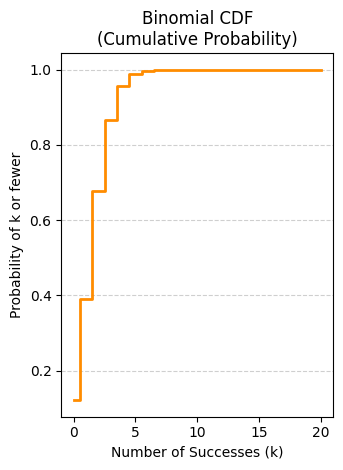

In [9]:
plt.subplot(1, 2, 2)
# 'step' is used because binomial is discrete (you can't have 1.5 successes)
plt.step(k_values, cdf_values, where='mid', color='darkorange', linewidth=2)
plt.title(f'Binomial CDF\n(Cumulative Probability)')
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability of k or fewer')
plt.grid(axis='y', linestyle='--', alpha=0.6) # Add gridlines for readability

plt.tight_layout() # Adjust layout so titles don't overlap
plt.show()

In [10]:
# Calculating the Average (Mean) of the distribution
# Formula: n * p
mean = n * p
print(f"Expected Average Successes: {mean}")

# Calculating the chance of a specific event
# binom.pmf(k, n, p)
prob_3 = binom.pmf(3, n, p)
print(f"The probability that exactly 3 people click is: {prob_3:.2%}")

# Calculating the chance of a range (At least 1 success)
# This is 1 minus the chance of ZERO successes
prob_at_least_one = 1 - binom.pmf(0, n, p)
print(f"The probability that at least one person clicks: {prob_at_least_one:.2%}")

Expected Average Successes: 2.0
The probability that exactly 3 people click is: 19.01%
The probability that at least one person clicks: 87.84%
